In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
train = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 2/DATASET/train.csv").drop("~", axis = 1) #경로지정
test = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 2/DATASET/test.csv").drop("No", axis = 1)
sample_sub = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 2/DATASET/submission.csv")

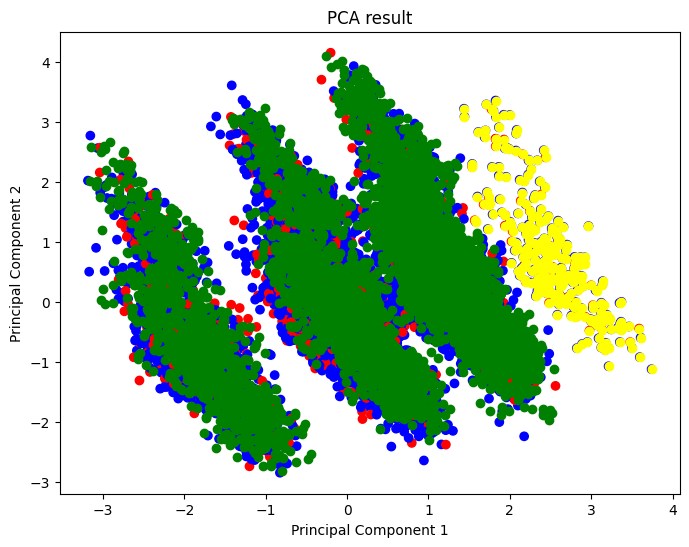

In [106]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

from sklearn.datasets import make_blobs
X = train.drop("Death", axis = 1)
y = train['Death']
death = y 

X_test = test.copy()

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_test_scaled = sc.transform(X_test)

pca = PCA(n_components=2)    
X_pca = pca.fit_transform(X_scaled)
X_pca_test = pca.transform(X_test_scaled)

train['PC1'] = X_pca[:, 0]
train['PC2'] = X_pca[:, 1]

# 결과 시각화
plt.figure(figsize=(8,6))
colors = ['blue' if value == 0 else 'red' for value in death]  # Death 값에 따른 색상 지정
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)  # c 인자로 색상 지정
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c='green')  # c 인자로 색상 지정

# condition 지정
condition = (train['PC1'] > 2.1) & (train['PC2'] > -0.4) | (train['PC1'] > 2.7) | (train['PC1'] > 2) & (train['PC2'] > 0.5) | (train['PC1'] > 1.8) & (train['PC2'] > 1) | (train['PC1'] > 1.45) & (train['PC2'] > 1.2) | (train['PC1'] > 1) & (train['PC2'] > 2.8)
plt.scatter(train.loc[(condition), 'PC1'], train.loc[(condition), 'PC2'], c='yellow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA result')
plt.show()

In [137]:
train.value_counts("Death") / len(train)

Death
0    0.7897
1    0.2103
Name: count, dtype: float64

In [5]:
train.columns

Index(['AGE', 'Adenocarcinoma', 'Large cell carcinoma',
       'Squamous cell carcinoma', 'TX', 'T0', 'T1', 'T1a', 'T1b', 'T1c', 'T2',
       'T2a', 'T2b', 'T3', 'T4', 'N1', 'N2', 'N3', 'M1a', 'M1b', 'M1c',
       'Type of Drink', 'Smoke', 'Height', 'Weight', 'FEV1_FVC_P', 'DLCO_VA_P',
       'EGFR mutation Detection', 'Operation', 'Chemotherapy',
       'Radiation Therapy', 'Survival period', 'Death'],
      dtype='object')

In [4]:
train.head(20)

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,TX,T0,T1,T1a,T1b,T1c,...,Height,Weight,FEV1_FVC_P,DLCO_VA_P,EGFR mutation Detection,Operation,Chemotherapy,Radiation Therapy,Survival period,Death
0,72,1,1,0,1,0,0,0,0,0,...,142.0,68.2,87,102,99,1,0,0,157,0
1,66,1,0,0,0,0,1,0,0,0,...,179.4,61.1,54,112,99,0,1,0,567,0
2,75,1,1,0,1,0,0,0,0,0,...,169.8,73.8,79,73,99,0,1,0,253,0
3,77,1,0,1,0,0,1,0,0,0,...,158.5,79.1,78,137,1,0,0,0,266,0
4,85,1,0,0,0,0,0,0,0,1,...,172.3,44.3,48,85,99,1,0,1,470,0
5,82,1,1,0,1,0,0,0,0,0,...,153.8,44.4,85,105,99,0,0,0,407,0
6,67,0,0,0,0,0,0,1,0,0,...,146.4,62.4,64,27,99,1,0,0,225,0
7,73,1,0,1,0,0,0,0,0,0,...,144.1,56.8,52,132,1,1,1,0,568,0
8,66,1,0,1,0,0,0,0,0,0,...,151.8,45.0,91,85,99,0,0,0,320,0
9,84,1,0,0,1,0,0,0,0,0,...,171.0,68.4,88,108,99,1,1,0,364,1


In [138]:
train.describe()

,AGE,Adenocarcinoma,Large cell carcinoma,Squamous cell carcinoma,TX,T0,T1,T1a,T1b,T1c,...,Height,Weight,FEV1_FVC_P,DLCO_VA_P,EGFR mutation Detection,Operation,Chemotherapy,Radiation Therapy,Survival period,Death
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,63.005500,0.691900,0.184000,0.293800,0.197300,0.038000,0.159800,0.150800,0.103900,0.086000,...,162.605740,64.854120,69.773300,95.436000,68.448100,0.58900,0.453300,0.254100,273.236300,0.210300
std,13.906603,0.461731,0.387504,0.455524,0.397981,0.191206,0.366439,0.357872,0.305146,0.280378,...,10.306779,13.063174,16.459957,31.400846,45.573273,0.49204,0.497839,0.435376,184.995361,0.407542
min,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,142.000000,34.300000,31.000000,27.000000,0.000000,0.00000,0.000000,0.000000,16.000000,0.000000
25%,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,154.600000,54.500000,57.000000,71.000000,1.000000,0.00000,0.000000,0.000000,122.000000,0.000000
50%,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,162.400000,64.200000,72.000000,95.000000,99.000000,1.00000,0.000000,0.000000,228.000000,0.000000
75%,74.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,170.800000,74.400000,82.000000,120.000000,99.000000,1.00000,1.000000,1.000000,400.000000,0.000000
max,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,188.300000,105.100000,99.000000,161.000000,99.000000,1.00000,1.000000,1.000000,730.000000,1.000000


In [139]:
train.columns

Index(['AGE', 'Adenocarcinoma', 'Large cell carcinoma',
       'Squamous cell carcinoma', 'TX', 'T0', 'T1', 'T1a', 'T1b', 'T1c', 'T2',
       'T2a', 'T2b', 'T3', 'T4', 'N1', 'N2', 'N3', 'M1a', 'M1b', 'M1c',
       'Type of Drink', 'Smoke', 'Height', 'Weight', 'FEV1_FVC_P', 'DLCO_VA_P',
       'EGFR mutation Detection', 'Operation', 'Chemotherapy',
       'Radiation Therapy', 'Survival period', 'Death'],
      dtype='object')

In [140]:
train.corr()['Death']

AGE                        0.006784
Adenocarcinoma             0.001560
Large cell carcinoma       0.006363
Squamous cell carcinoma   -0.002619
TX                         0.009297
T0                        -0.006307
T1                         0.007327
T1a                       -0.001462
T1b                        0.010051
T1c                       -0.022632
T2                         0.005584
T2a                       -0.003256
T2b                        0.005483
T3                        -0.003690
T4                        -0.009487
N1                        -0.010457
N2                         0.005322
N3                        -0.007856
M1a                        0.000063
M1b                        0.011132
M1c                       -0.007388
Type of Drink             -0.007889
Smoke                     -0.021973
Height                    -0.008228
Weight                    -0.003145
FEV1_FVC_P                -0.012497
DLCO_VA_P                  0.003611
EGFR mutation Detection   -0

# Domain Knowledge 정리

- TNM 병질 정보
[Reference] : https://www.cancerresearchuk.org/about-cancer/lung-cancer/stages-types-grades/tnm-staging

- TNM 에 따른 category

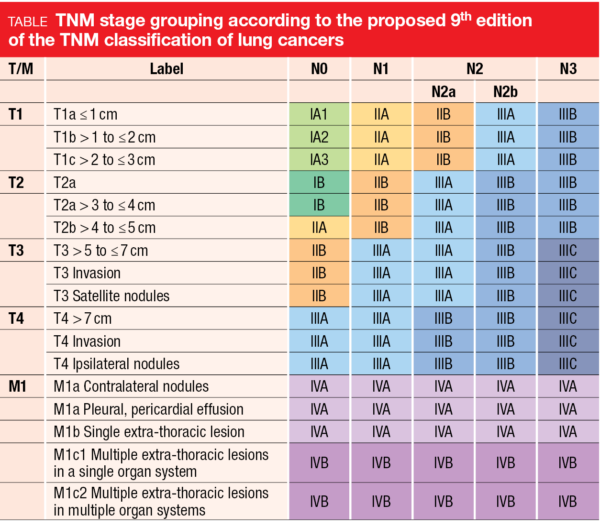

- AGE 진단시연령
- Adenocarcinoma 조직학적진단명 코드 설명
- Large cell carcinoma 조직학적진단명 코드 설명
- Squamous cell carcinoma 조직학적진단명 코드 설명
- TX 병기STAGE
- T0 병기STAGE
- T1 병기STAGE
- T1a 병기STAGE
- T1b 병기STAGE
- T1c 병기STAGE
- T2 병기STAGE
- T2a 병기STAGE
- T2b 병기STAGE
- T3 병기STAGE
- T4 병기STAGE
- N1 병기STAGE
- N2 병기STAGE
- N3 병기STAGE
- M1a 병기STAGE
- M1b 병기STAGE
- M1c 병기STAGE
- Type of Drink 음주종류
- Smoke 흡연여부
- Height 신장값
- Weight 체중측정값
- FEV1_FVC_P FEV 검사 값
- DLCO_VA_P DLCO 검사 값
- EGFR mutation Detection EGFR mutation 발견 여부
- Operation 수술여부
- Chemotherapy 항암치료여부
- Radiation Therapy 방사선치료여부
- Death 사망여부
- Survival period 암진단후생존일수

# Feature Engineering

## T

### ratio

In [21]:
train[train['TX'] == 1]['Death'].value_counts() / len(train[train['TX'] == 1])

Death
0    0.782058
1    0.217942
Name: count, dtype: float64

In [25]:
train[train['T0'] == 1]['Death'].value_counts() / len(train[train['T0'] == 1])

Death
0    0.802632
1    0.197368
Name: count, dtype: float64

In [22]:
train[train['T1'] == 1]['Death'].value_counts() / len(train[train['T1'] == 1])

Death
0    0.782854
1    0.217146
Name: count, dtype: float64

In [26]:
train[train['T1a'] == 1]['Death'].value_counts() / len(train[train['T1a'] == 1])

Death
0    0.791114
1    0.208886
Name: count, dtype: float64

In [28]:
train[train['T1b'] == 1]['Death'].value_counts() / len(train[train['T1b'] == 1])

Death
0    0.777671
1    0.222329
Name: count, dtype: float64

In [41]:
train[train['T1c'] == 1]['Death'].value_counts() / len(train[train['T1c'] == 1])

Death
0    0.819767
1    0.180233
Name: count, dtype: float64

In [23]:
train[train['T2'] == 1]['Death'].value_counts() / len(train[train['T2'] == 1])

Death
0    0.780357
1    0.219643
Name: count, dtype: float64

In [39]:
train[train['T2a'] == 1]['Death'].value_counts() / len(train[train['T2a'] == 1])

Death
0    0.794643
1    0.205357
Name: count, dtype: float64

In [40]:
train[train['T2b'] == 1]['Death'].value_counts() / len(train[train['T2b'] == 1])

Death
0    0.779661
1    0.220339
Name: count, dtype: float64

In [24]:
train[train['T3'] == 1]['Death'].value_counts() / len(train[train['T3'] == 1])

Death
0    0.79703
1    0.20297
Name: count, dtype: float64

In [29]:
train[train['T4'] == 1]['Death'].value_counts() / len(train[train['T4'] == 1])

Death
0    0.806026
1    0.193974
Name: count, dtype: float64

## N

### ratio

In [42]:
train[train['N1'] == 1]['Death'].value_counts() / len(train[train['N1'] == 1])

Death
0    0.798873
1    0.201127
Name: count, dtype: float64

In [43]:
train[train['N2'] == 1]['Death'].value_counts() / len(train[train['N2'] == 1])

Death
0    0.784665
1    0.215335
Name: count, dtype: float64

In [44]:
train[train['N3'] == 1]['Death'].value_counts() / len(train[train['N3'] == 1])

Death
0    0.797888
1    0.202112
Name: count, dtype: float64

In [47]:
train.loc[(train['N1'] == 0) & (train['N2'] == 0) & (train['N3'] == 0), 'N0'] = 1
train.loc[(train['N1'] == 1 ) | (train['N2'] == 1) | (train['N3'] == 1), 'N0'] = 0

## M

In [19]:
train.loc[(train['M1a'] == 1 ) | (train['M1b'] == 1) | (train['M1c'] == 1), 'M0' ] = 0 
train.loc[(train['M1a'] == 0) & (train['M1b'] == 0) & (train['M1c'] == 0),'M0'] = 1

In [20]:
train.corr()['Death']

AGE                        0.006784
Adenocarcinoma             0.001560
Large cell carcinoma       0.006363
Squamous cell carcinoma   -0.002619
TX                         0.009297
T0                        -0.006307
T1                         0.007327
T1a                       -0.001462
T1b                        0.010051
T1c                       -0.022632
T2                         0.005584
T2a                       -0.003256
T2b                        0.005483
T3                        -0.003690
T4                        -0.009487
N1                        -0.010457
N2                         0.005322
N3                        -0.007856
M1a                        0.000063
M1b                        0.011132
M1c                       -0.007388
Type of Drink             -0.007889
Smoke                     -0.021973
Height                    -0.008228
Weight                    -0.003145
FEV1_FVC_P                -0.012497
DLCO_VA_P                  0.003611
EGFR mutation Detection   -0

In [45]:
train[train['M1a'] == 1]['Death'].value_counts() / len(train[train['M1a'] == 1])

Death
0    0.789634
1    0.210366
Name: count, dtype: float64

In [46]:
train[train['M1b'] == 1]['Death'].value_counts() / len(train[train['M1b'] == 1])

Death
0    0.777949
1    0.222051
Name: count, dtype: float64

In [47]:
train[train['M1c'] == 1]['Death'].value_counts() / len(train[train['M1c'] == 1])

Death
0    0.798077
1    0.201923
Name: count, dtype: float64

## stage

In [210]:
train.loc[(train['M1a'] == 1 ) | (train['M1b'] == 1) | (train['M1c'] == 1), 'M0' ] = 0 
train.loc[(train['M1a'] == 0) & (train['M1b'] == 0) & (train['M1c'] == 0),'M0'] = 1

#N
train.loc[(train['N1'] == 1 ) | (train['N2'] == 1) | (train['N3'] == 1), 'N0'] = 0
train.loc[(train['N1'] == 0) & (train['N2'] == 0) & (train['N3'] == 0), 'N0'] = 1

In [211]:
train.columns

Index(['AGE', 'Adenocarcinoma', 'Large cell carcinoma',
       'Squamous cell carcinoma', 'TX', 'T0', 'T1', 'T1a', 'T1b', 'T1c', 'T2',
       'T2a', 'T2b', 'T3', 'T4', 'N1', 'N2', 'N3', 'M1a', 'M1b', 'M1c',
       'Type of Drink', 'Smoke', 'Height', 'Weight', 'FEV1_FVC_P', 'DLCO_VA_P',
       'EGFR mutation Detection', 'Operation', 'Chemotherapy',
       'Radiation Therapy', 'Survival period', 'Death', 'M0', 'N0'],
      dtype='object')

In [212]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      10000 non-null  int64  
 1   Adenocarcinoma           10000 non-null  int64  
 2   Large cell carcinoma     10000 non-null  int64  
 3   Squamous cell carcinoma  10000 non-null  int64  
 4   TX                       10000 non-null  int64  
 5   T0                       10000 non-null  int64  
 6   T1                       10000 non-null  int64  
 7   T1a                      10000 non-null  int64  
 8   T1b                      10000 non-null  int64  
 9   T1c                      10000 non-null  int64  
 10  T2                       10000 non-null  int64  
 11  T2a                      10000 non-null  int64  
 12  T2b                      10000 non-null  int64  
 13  T3                       10000 non-null  int64  
 14  T4                     

In [213]:
import pandas as pd

def assign_tnm_stage(data):
    stage_map = {

        ('T1', 'N0'): 'IA', ('T1', 'N1'): 'IIA', ('T1', 'N2'): 'IIB', ('T1', 'N3'): 'IIIA', ('T1', 'N0'): 'IVA', ('T1', 'N0'): 'IVA', ('T1', 'N0'): 'IVB',
        ('T1a', 'N0'): 'IA', ('T1a', 'N1'): 'IIA', ('T1a', 'N2'): 'IIB', ('T1a', 'N3'): 'IIIA', ('T1a', 'N0'): 'IVA', ('T1a', 'N0'): 'IVA', ('T1a', 'N0'): 'IVB',
        ('T1b', 'N0'): 'IA', ('T1b', 'N1'): 'IIA', ('T1b', 'N2'): 'IIB', ('T1b', 'N3'): 'IIIA', ('T1b', 'N0'): 'IVA', ('T1b', 'N0'): 'IVA', ('T1b', 'N0'): 'IVB',
        ('T1c', 'N0'): 'IA', ('T1c', 'N1'): 'IIA', ('T1c', 'N2'): 'IIB', ('T1c', 'N3'): 'IIIA', ('T1c', 'N0'): 'IVA', ('T1c', 'N0'): 'IVA', ('T1c', 'N0'): 'IVB',
        ('T2', 'N0'): 'IB', ('T2', 'N1'): 'IIB', ('T2', 'N2'): 'IIIA', ('T2', 'N3'): 'IIIB', ('T2', 'N0'): 'IVA', ('T2', 'N0'): 'IVA', ('T2', 'N0'): 'IVB',
        ('T2a', 'N0'): 'IB', ('T2a', 'N1'): 'IIB', ('T2a', 'N2'): 'IIIA', ('T2a', 'N3'): 'IIIB', ('T2a', 'N0'): 'IVA', ('T2a', 'N0'): 'IVA', ('T2a', 'N0'): 'IVB',
        ('T2b', 'N0'): 'IIA', ('T2b', 'N1'): 'IIB', ('T2b', 'N2'): 'IIIA', ('T2b', 'N3'): 'IIIB', ('T2b', 'N0'): 'IVA', ('T2b', 'N0'): 'IVA', ('T2b', 'N0'): 'IVB',
        ('T3', 'N0'): 'IIB', ('T3', 'N1'): 'IIIA', ('T3', 'N2'): 'IIIA', ('T3', 'N3'): 'IIIB', ('T3', 'N0'): 'IVA', ('T3', 'N0'): 'IVA', ('T3', 'N0'): 'IVB',
        ('T4', 'N0'): 'IIIA', ('T4', 'N1'): 'IIIA', ('T4', 'N2'): 'IIIB', ('T4', 'N3'): 'IIIC', ('T4', 'N0'): 'IVA', ('T4', 'N0'): 'IVA', ('T4', 'N0'): 'IVB'
    }

    for t in ['T1', 'T1a', 'T1b', 'T1c', 'T2', 'T2a', 'T2b', 'T3', 'T4']:
        for n in ['N0', 'N1', 'N2', 'N3']:
            mask = (data[t] == 1) & (data[n] == 1)
            target = stage_map.get((t, n), 'Invalid TNM')
            data.loc[mask, 'TNM_stage'] = target
            if target == 'Invalid TNM':
                print((t, n))

    data.loc[data['M1a'] == 1, 'TNM_stage'] = 'IVA'
    data.loc[data['M1b'] == 1, 'TNM_stage'] = 'IVA'
    data.loc[data['M1c'] == 1, 'TNM_stage'] = 'IVB'
    return data

# 사용 예시
train['TNM_stage'] = ''

train = assign_tnm_stage(train)


In [215]:
stage_encode = {'' : 0, 'IA' : 1, "IB" : 2, "IIA" : 3, "IIB" : 4 , "IIIA" : 5, "IIIB" : 6, "IIIC": 7, "IVA": 8, "IVB":9}

train['TNM_stage'] = train['TNM_stage'].map(stage_encode)

In [216]:
train[['TNM_stage','Death']].value_counts().sort_index()

TNM_stage  Death
0          0        1186
           1         327
3          0         376
           1          81
4          0         516
           1         145
5          0         550
           1         124
6          0         193
           1          51
7          0          33
           1           8
8          0        2045
           1         564
9          0        2998
           1         803
Name: count, dtype: int64

In [218]:
train.corr()['Death']

AGE                        0.006784
Adenocarcinoma             0.001560
Large cell carcinoma       0.006363
Squamous cell carcinoma   -0.002619
TX                         0.009297
T0                        -0.006307
T1                         0.007327
T1a                       -0.001462
T1b                        0.010051
T1c                       -0.022632
T2                         0.005584
T2a                       -0.003256
T2b                        0.005483
T3                        -0.003690
T4                        -0.009487
N1                        -0.010457
N2                         0.005322
N3                        -0.007856
M1a                        0.000063
M1b                        0.011132
M1c                       -0.007388
Type of Drink             -0.007889
Smoke                     -0.021973
Height                    -0.008228
Weight                    -0.003145
FEV1_FVC_P                -0.012497
DLCO_VA_P                  0.003611
EGFR mutation Detection   -0

## Surgery
- 'Operation', 'Chemotherapy', 'Radiation Therapy'

In [157]:
train[train['Operation'] == 1]['Death'].value_counts() / len(train[train['Operation'] == 1])

Death
0    0.79202
1    0.20798
Name: count, dtype: float64

In [158]:
train[train['Chemotherapy'] == 1]['Death'].value_counts() / len(train[train['Chemotherapy'] == 1])

Death
0    0.785352
1    0.214648
Name: count, dtype: float64

In [159]:
train[train['Radiation Therapy'] == 1]['Death'].value_counts() / len(train[train['Radiation Therapy'] == 1])

Death
0    0.786305
1    0.213695
Name: count, dtype: float64

In [160]:
train[(train['Operation'] == 0) & (train['Radiation Therapy'] == 0) & (train['Radiation Therapy'] == 0)]['Death'].value_counts() / len(train[(train['Operation'] == 0) & (train['Radiation Therapy'] == 0) & (train['Radiation Therapy'] == 0)])

Death
0    0.787179
1    0.212821
Name: count, dtype: float64

In [161]:
train[(train['Operation'] == 1) | (train['Radiation Therapy'] == 1) | (train['Radiation Therapy'] == 1)]['Death'].value_counts() / len(train[(train['Operation'] == 1) | (train['Radiation Therapy'] == 1) | (train['Radiation Therapy'] == 1)])

Death
0    0.790819
1    0.209181
Name: count, dtype: float64

In [162]:
train['Therapy_count'] = train['Operation'] + train['Chemotherapy'] + train['Radiation Therapy']

In [163]:
train.corr()['Death']

AGE                        0.006784
Adenocarcinoma             0.001560
Large cell carcinoma       0.006363
Squamous cell carcinoma   -0.002619
TX                         0.009297
T0                        -0.006307
T1                         0.007327
T1a                       -0.001462
T1b                        0.010051
T1c                       -0.022632
T2                         0.005584
T2a                       -0.003256
T2b                        0.005483
T3                        -0.003690
T4                        -0.009487
N1                        -0.010457
N2                         0.005322
N3                        -0.007856
M1a                        0.000063
M1b                        0.011132
M1c                       -0.007388
Type of Drink             -0.007889
Smoke                     -0.021973
Height                    -0.008228
Weight                    -0.003145
FEV1_FVC_P                -0.012497
DLCO_VA_P                  0.003611
EGFR mutation Detection   -0

In [18]:
train[['Therapy_count', 'Death']].value_counts().sort_index()

Therapy_count  Death
0              0        1313
               1         359
1              0        3475
               1         902
2              0        2579
               1         687
3              0         530
               1         155
Name: count, dtype: int64

In [19]:
train[train['Therapy_count'] == 0]['Death'].value_counts() / len(train[train['Therapy_count'] == 0])

Death
0    0.785287
1    0.214713
Name: count, dtype: float64

In [20]:
train[train['Therapy_count'] == 1]['Death'].value_counts() / len(train[train['Therapy_count'] == 1])

Death
0    0.793923
1    0.206077
Name: count, dtype: float64

In [21]:
train[train['Therapy_count'] == 2]['Death'].value_counts() / len(train[train['Therapy_count'] == 2])

Death
0    0.789651
1    0.210349
Name: count, dtype: float64

In [22]:
train[train['Therapy_count'] == 3]['Death'].value_counts() / len(train[train['Therapy_count'] == 3])

Death
0    0.773723
1    0.226277
Name: count, dtype: float64

## Other

## Survival period

In [24]:
# survival period analysis
train['Survival period'].describe()

count    10000.000000
mean       273.236300
std        184.995361
min         16.000000
25%        122.000000
50%        228.000000
75%        400.000000
max        730.000000
Name: Survival period, dtype: float64

In [25]:
# death가 0일때와 1일때 생존기간 비교
train[train['Death'] == 0]['Survival period'].describe()

count    7897.000000
mean      275.119919
std       185.124928
min        16.000000
25%       123.000000
50%       229.000000
75%       405.000000
max       730.000000
Name: Survival period, dtype: float64

In [26]:
train[train['Death'] == 1]['Survival period'].describe()

count    2103.000000
mean      266.163100
std       184.380152
min        16.000000
25%       117.000000
50%       221.000000
75%       371.000000
max       730.000000
Name: Survival period, dtype: float64

<Axes: xlabel='Survival period', ylabel='Density'>

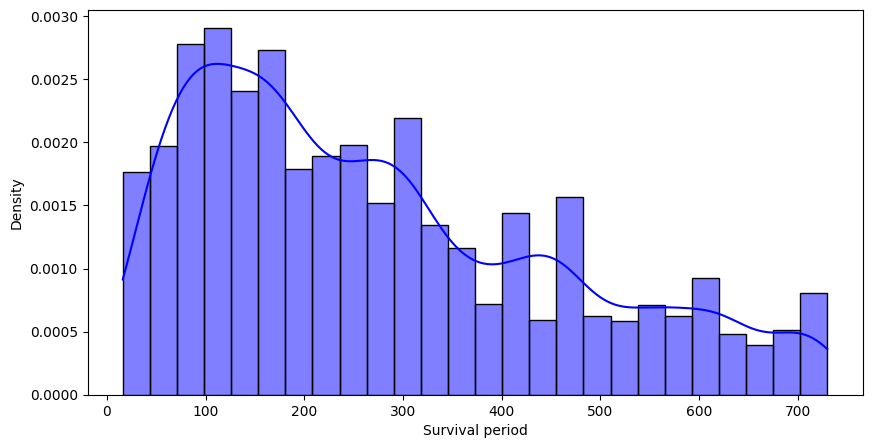

In [223]:
plt.figure(figsize = (10, 5))
sns.histplot(train[train['Death'] == 0]['Survival period'], color = 'blue', kde = True, stat = 'density')

<Axes: xlabel='Survival period', ylabel='Density'>

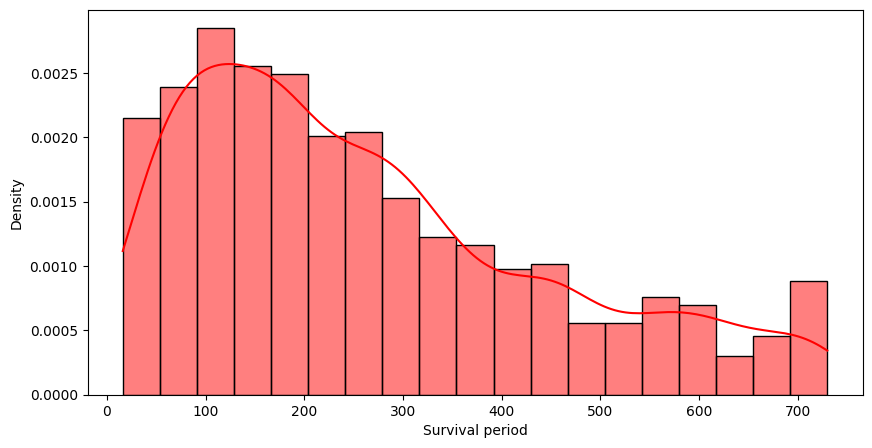

In [228]:
plt.figure(figsize = (10, 5))
sns.histplot(train[train['Death'] == 1]['Survival period'], color = 'red', kde = True, stat = 'density')

In [234]:
train['Smoke'].value_counts()

Smoke
2    6808
0    2045
1    1147
Name: count, dtype: int64